In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import import_ipynb
import EDA_performance_yearly

# Read dataset
file_path = "Study Case DA (1).xlsx"

In [93]:
# Menampilkan semua kolom tanpa terpotong
pd.set_option('display.max_columns', None)

In [94]:
employees = pd.read_excel(file_path, sheet_name="employees")

In [95]:
employees.head()

,employee_id,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months
0,EMP100000,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64
1,EMP100001,Wulan Setiawan,476388,4,4,4,5,5,3,1,1,2,16
2,EMP100002,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,58
3,EMP100003,Oka Halim,751615,1,3,4,2,1,1,2,2,5,15
4,EMP100004,Dwi Pratama,443809,3,4,6,5,3,3,1,1,5,34


In [96]:
for year in range(2021, 2025 + 1):
    df_perf = getattr(EDA_performance_yearly, f"performance_{year}")

    globals()[f"per_emp_{year}"] = df_perf.merge(
        employees,
        on="employee_id",
        how="inner"
    )


In [97]:
display(per_emp_2021['year'].value_counts())
display(per_emp_2022['year'].value_counts())
display(per_emp_2023['year'].value_counts())
display(per_emp_2024['year'].value_counts())
display(per_emp_2025['year'].value_counts())

year
2021    1547
Name: count, dtype: int64

year
2022    1850
Name: count, dtype: int64

year
2023    1852
Name: count, dtype: int64

year
2024    1868
Name: count, dtype: int64

year
2025    1790
Name: count, dtype: int64

# Analisis

In [98]:
dfs = [
    (per_emp_2021, 2021),
    (per_emp_2022, 2022),
    (per_emp_2023, 2023),
    (per_emp_2024, 2024),
    (per_emp_2025, 2025),
]

for df, year in dfs:
    # tambahkan kolom is_high
    df['is_high'] = (df['rating'] == 5).astype(int)

In [99]:
corr_vars = [
    'company_id',
    'area_id',
    'position_id',
    'department_id',
    'division_id',
    'directorate_id',
    'grade_id',
    'education_id',
    'major_id',
    'years_of_service_months',
    'rating'
]

In [100]:
corr_vars_cat = [c for c in corr_vars if c not in [
    'years_of_service_months',
    'rating'
]]

In [101]:
import scipy.stats as stats
import numpy as np

dfs = [
    (per_emp_2021, 2021),
    (per_emp_2022, 2022),
    (per_emp_2023, 2023),
    (per_emp_2024, 2024),
    (per_emp_2025, 2025),
]

all_cramers_results = []

for df, year in dfs:
    print(f"===== Cramér’s V Tahun {year} =====")
    cramers_results = []
    
    for cat in corr_vars_cat:
        # crosstab untuk categorical variable vs is_high
        table = pd.crosstab(df[cat], df['is_high'])
        
        # chi-square
        chi2, p, dof, exp = stats.chi2_contingency(table)
        
        # sample size
        n = table.sum().sum()
        
        # Cramér’s V
        cramers_v = np.sqrt(chi2 / (n * (min(table.shape) - 1)))
        
        # print hasil
        print(f"{cat}: Cramér’s V = {cramers_v:.3f}, p = {p:.4f}")
        
        # simpan
        cramers_results.append({
            'Year': year,
            'Variable': cat,
            'CramersV': cramers_v,
            'p_value': p
        })
    
    print()
    all_cramers_results.extend(cramers_results)


===== Cramér’s V Tahun 2021 =====
company_id: Cramér’s V = 0.037, p = 0.5573
area_id: Cramér’s V = 0.033, p = 0.6495
position_id: Cramér’s V = 0.045, p = 0.6804
department_id: Cramér’s V = 0.049, p = 0.5910
division_id: Cramér’s V = 0.049, p = 0.4383
directorate_id: Cramér’s V = 0.042, p = 0.2491
grade_id: Cramér’s V = 0.026, p = 0.5971
education_id: Cramér’s V = 0.049, p = 0.2905
major_id: Cramér’s V = 0.074, p = 0.1339

===== Cramér’s V Tahun 2022 =====
company_id: Cramér’s V = 0.035, p = 0.5148
area_id: Cramér’s V = 0.036, p = 0.5027
position_id: Cramér’s V = 0.059, p = 0.2700
department_id: Cramér’s V = 0.033, p = 0.8417
division_id: Cramér’s V = 0.052, p = 0.2961
directorate_id: Cramér’s V = 0.022, p = 0.6389
grade_id: Cramér’s V = 0.023, p = 0.6079
education_id: Cramér’s V = 0.048, p = 0.2390
major_id: Cramér’s V = 0.058, p = 0.2921

===== Cramér’s V Tahun 2023 =====
company_id: Cramér’s V = 0.015, p = 0.9358
area_id: Cramér’s V = 0.052, p = 0.1745
position_id: Cramér’s V = 0.044

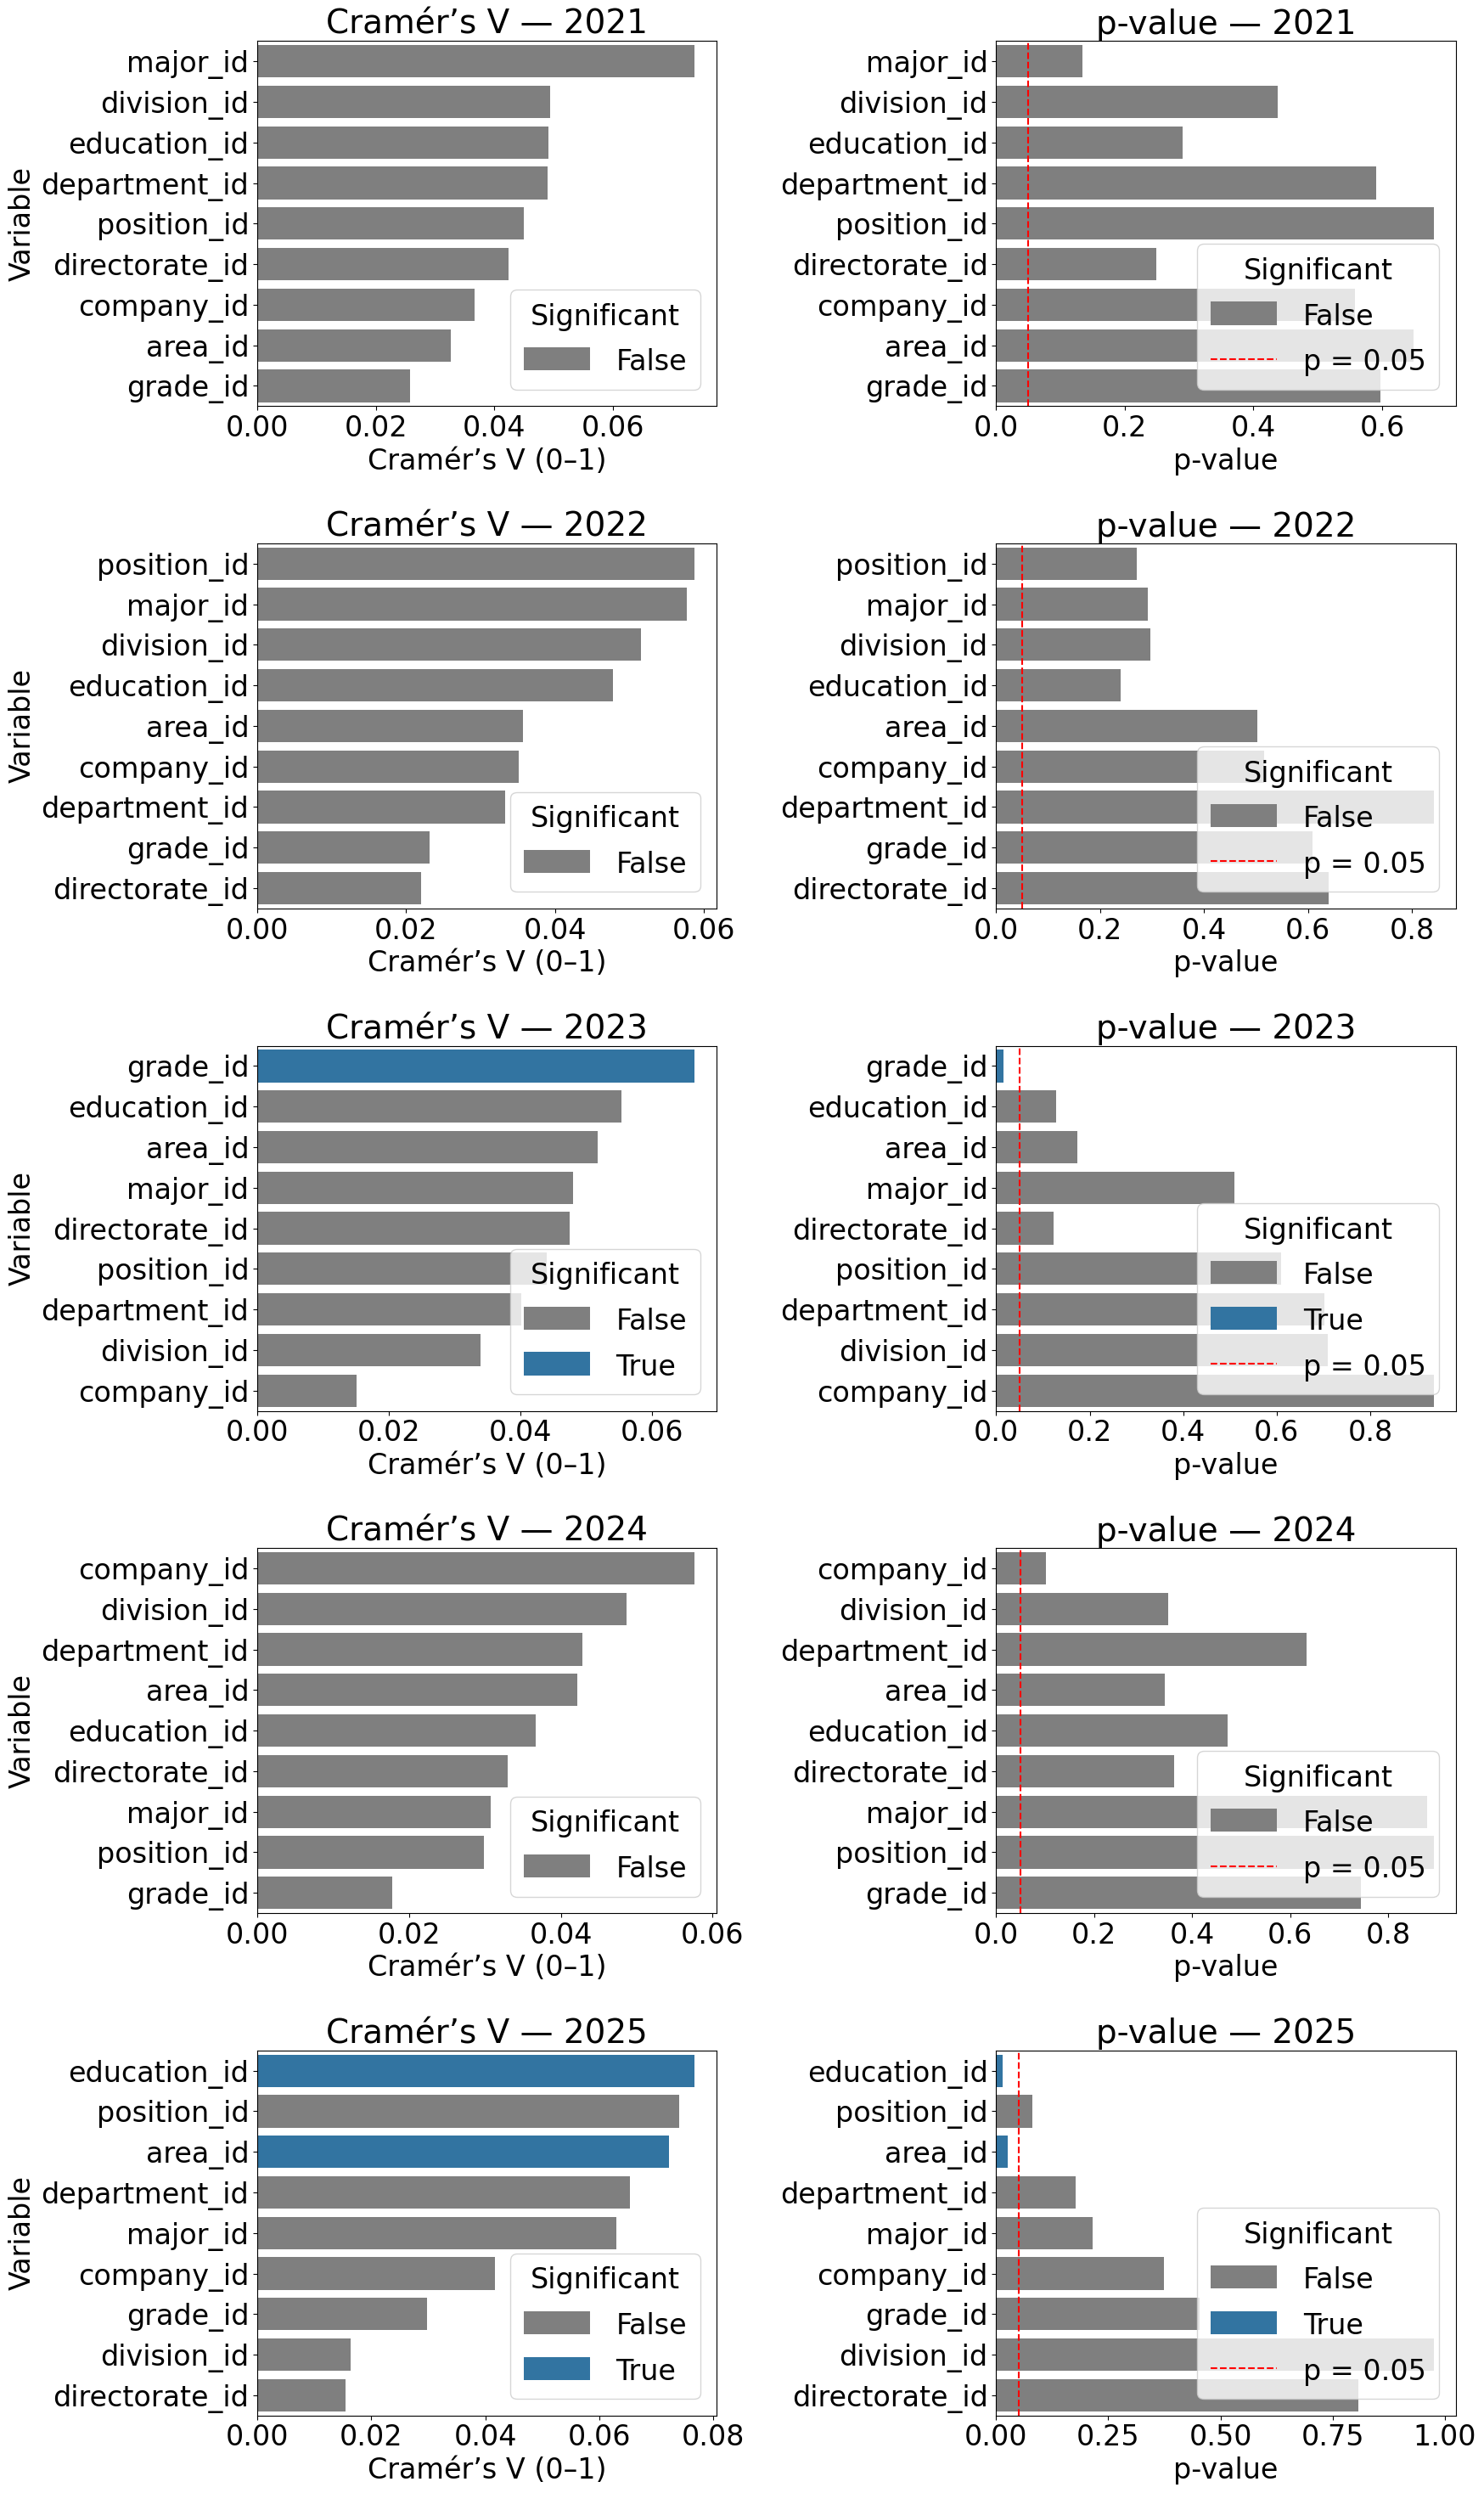

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- pastikan cramer_df sudah tersedia ---
cramer_df = pd.DataFrame(all_cramers_results)

# kolom signifikan
cramer_df['Significant'] = cramer_df['p_value'] < 0.05

# sort berdasarkan Cramér’s V biar rapi
cramer_df = cramer_df.sort_values(by=['Year', 'CramersV'], ascending=[True, False])

# --- Buat subplot per tahun ---
years = cramer_df['Year'].unique()
num_years = len(years)

fig, axes = plt.subplots(num_years, 2, figsize=(18, 6 * num_years))

if num_years == 1:
    axes = [axes]  # kalau hanya satu tahun

for i, year in enumerate(years):

    df_year = cramer_df[cramer_df['Year'] == year]

    # =========================
    #  PLOT 1 - CRAMÉR'S V
    # =========================
    sns.barplot(
        data=df_year,
        x='CramersV',
        y='Variable',
        hue='Significant',
        dodge=False,
        palette={True: 'tab:blue', False: 'tab:gray'},
        ax=axes[i][0]
    )

    ax = axes[i][0]
    ax.set_title(f"Cramér’s V — {year}", fontsize=28)
    ax.set_xlabel("Cramér’s V (0–1)", fontsize=24)
    ax.set_ylabel("Variable", fontsize=24)
    ax.tick_params(axis='both', labelsize=24)

    leg = ax.legend(title="Significant", loc='lower right')
    leg.set_title("Significant", prop={'size': 24})
    for t in leg.get_texts():
        t.set_fontsize(24)

    # =========================
    #  PLOT 2 - P VALUE
    # =========================
    sns.barplot(
        data=df_year,
        x='p_value',
        y='Variable',
        hue='Significant',
        dodge=False,
        palette={True: 'tab:blue', False: 'tab:gray'},
        ax=axes[i][1]
    )

    ax2 = axes[i][1]
    ax2.axvline(0.05, color='red', linestyle='--', label='p = 0.05')
    ax2.set_title(f"p-value — {year}", fontsize=28)
    ax2.set_xlabel("p-value", fontsize=24)
    ax2.set_ylabel("", fontsize=24)
    ax2.tick_params(axis='both', labelsize=24)

    leg2 = ax2.legend(title="Significant", loc='lower right')
    leg2.set_title("Significant", prop={'size': 24})
    for t in leg2.get_texts():
        t.set_fontsize(24)

plt.tight_layout()
plt.show()


In [103]:
import math

num_vars = ['years_of_service_months', 'rating']

pearson_all_years = []

for df, year in dfs:
    corrs = []
    
    for a in num_vars:
        for b in num_vars:
            if a == b:
                continue
            
            valid = df[[a, b]].dropna()
            if len(valid) < 10:
                continue
            
            r, p = stats.pearsonr(valid[a], valid[b])
            corrs.append({
                'Year': year,
                'Var1': a,
                'Var2': b,
                'r': r,
                'p': p,
                'n': len(valid)
            })
    
    print(f"=== Pearson Correlation {year} ===")
    display(pd.DataFrame(corrs).sort_values('r', key=abs, ascending=False))
    
    pearson_all_years.extend(corrs)


=== Pearson Correlation 2021 ===


,Year,Var1,Var2,r,p,n
0,2021,years_of_service_months,rating,0.018126,0.476203,1547
1,2021,rating,years_of_service_months,0.018126,0.476203,1547


=== Pearson Correlation 2022 ===


,Year,Var1,Var2,r,p,n
0,2022,years_of_service_months,rating,0.001657,0.943232,1850
1,2022,rating,years_of_service_months,0.001657,0.943232,1850


=== Pearson Correlation 2023 ===


,Year,Var1,Var2,r,p,n
0,2023,years_of_service_months,rating,-0.014283,0.539029,1852
1,2023,rating,years_of_service_months,-0.014283,0.539029,1852


=== Pearson Correlation 2024 ===


,Year,Var1,Var2,r,p,n
0,2024,years_of_service_months,rating,0.03458,0.13517,1868
1,2024,rating,years_of_service_months,0.03458,0.13517,1868


=== Pearson Correlation 2025 ===


,Year,Var1,Var2,r,p,n
0,2025,years_of_service_months,rating,0.023536,0.319635,1790
1,2025,rating,years_of_service_months,0.023536,0.319635,1790


In [136]:
# daftar asal
dfs_original = {
    2021: per_emp_2021,
    2022: per_emp_2022,
    2023: per_emp_2023,
    2024: per_emp_2024,
    2025: per_emp_2025,
}

# dictionary untuk dataframe baru
dfs_copied = {}

for year, df in dfs_original.items():

    # copy dataframe
    new_df = df.copy()

    # rename kolom
    new_df = new_df.rename(columns={
        "years_of_service_months": "yos_months"
    })

    # simpan dengan nama baru
    dfs_copied[year] = new_df

    # optional: assign ke variable baru seperti per_emp2_2021
    globals()[f"per_emp2_{year}"] = new_df


C:\Users\fajar\AppData\Local\Temp\ipykernel_9576\565648630.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.90, 1])


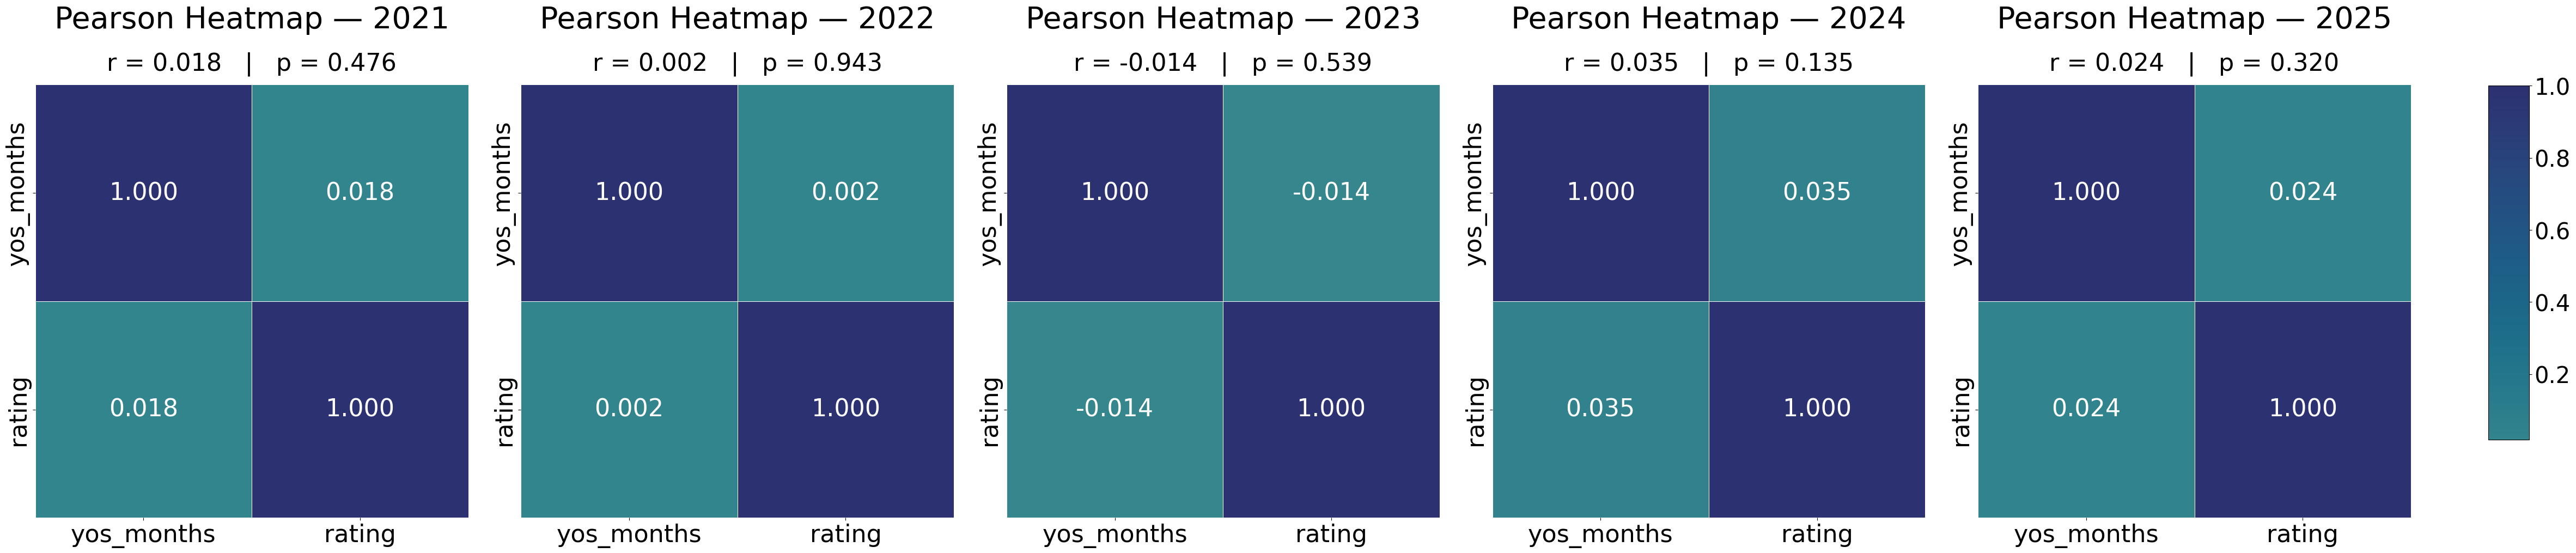

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy.stats import pearsonr

# --- Data untuk heatmap ---
num_vars_yos = ['yos_months', 'rating']
dfs_heatmap = [(df, year) for year, df in dfs_copied.items()]

# --- Grid layout ---
n_years = len(dfs_heatmap)
cols = 5
rows = math.ceil(n_years / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 10, rows * 10))
axes = axes.flatten()

heatmap_first = None

for i, (df, year) in enumerate(dfs_heatmap):

    corr_matrix = df[num_vars_yos].corr()

    # Hitung Pearson r & p-value
    r_val, p_val = pearsonr(df['yos_months'], df['rating'])
    n = len(df)

    ax = axes[i]

    # Heatmap
    heat = sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".3f",
        cmap="crest",
        center=0,
        linewidths=0.7,
        square=True,
        cbar=False,
        ax=ax,
        annot_kws={"fontsize": 32}
    )

    if heatmap_first is None:
        heatmap_first = heat

    # ----- Title + subtitle rapi -----
    title = f"Pearson Heatmap — {year}\n"
    subtitle = f"r = {r_val:.3f}   |   p = {p_val:.3f}"

    ax.set_title(title, fontsize=40, pad=30)
    ax.text(
        0.5, 1.02, subtitle,
        fontsize=32,
        ha="center",
        va="bottom",
        transform=ax.transAxes
    )

    # Tick labels
    ax.tick_params(axis='both', labelsize=32)

# Sembunyikan subplot kosong
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

# ----- Single Colorbar di kanan -----
cbar_ax = fig.add_axes([0.92, 0.20, 0.015, 0.65])
cbar = fig.colorbar(heatmap_first.collections[0], cax=cbar_ax)
cbar.ax.tick_params(labelsize=30)

# Perbaiki layout agar tidak saling tumpang tindih
plt.tight_layout(rect=[0, 0, 0.90, 1])

plt.show()


In [135]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

cat_vars = [
    'company_id',
    'area_id',
    'position_id',
    'department_id',
    'division_id',
    'directorate_id',
    'grade_id',
    'education_id',
    'major_id'
]

num_vars = ['years_of_service_months']

dfs = [
    (per_emp_2021, 2021),
    (per_emp_2022, 2022),
    (per_emp_2023, 2023),
    (per_emp_2024, 2024),
    (per_emp_2025, 2025),
]

logit_results = []

for df, year in dfs:
    print(f"\n========== LOGIT MODEL {year} ==========")

    # gabungkan numerik + dummy kategori
    X = df[num_vars].copy()
    X = pd.concat([X, pd.get_dummies(df[cat_vars], drop_first=True)], axis=1)

    y = df['is_high']

    # buang missing
    mask = y.notna() & X.notna().all(axis=1)
    X2 = sm.add_constant(X.loc[mask])

    try:
        model = sm.Logit(y.loc[mask], X2).fit(disp=False)

        # simpan hasil
        odds = np.exp(model.params)
        top10 = odds.sort_values(ascending=False).head(10)

        logit_results.append({
            "Year": year,
            "n_samples": len(X2),
            "n_features": X2.shape[1],
            "params": model.params,
            "odds": odds
        })

        # tampilkan ringkasan
        print(model.summary())

        # odds ratio
        print("\nTop 10 Odds Ratios:")
        print(top10)

    except Exception as e:
        print(f"Model gagal untuk tahun {year}: {e}")



========== LOGIT MODEL 2021 ==========
                           Logit Regression Results                           
Dep. Variable:                is_high   No. Observations:                 1547
Model:                          Logit   Df Residuals:                     1536
Method:                           MLE   Df Model:                           10
Date:                Sun, 16 Nov 2025   Pseudo R-squ.:                 0.01365
Time:                        17:11:34   Log-Likelihood:                -456.53
converged:                       True   LL-Null:                       -462.85
Covariance Type:            nonrobust   LLR p-value:                    0.2447
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.6652      0.669     -3.985      0.000      -3.976      -1.354
years_of_service_months     0.0020      0.004      0


========== LOGIT MODEL 2021 ==========

========== LOGIT MODEL 2022 ==========

========== LOGIT MODEL 2023 ==========

========== LOGIT MODEL 2024 ==========

========== LOGIT MODEL 2025 ==========


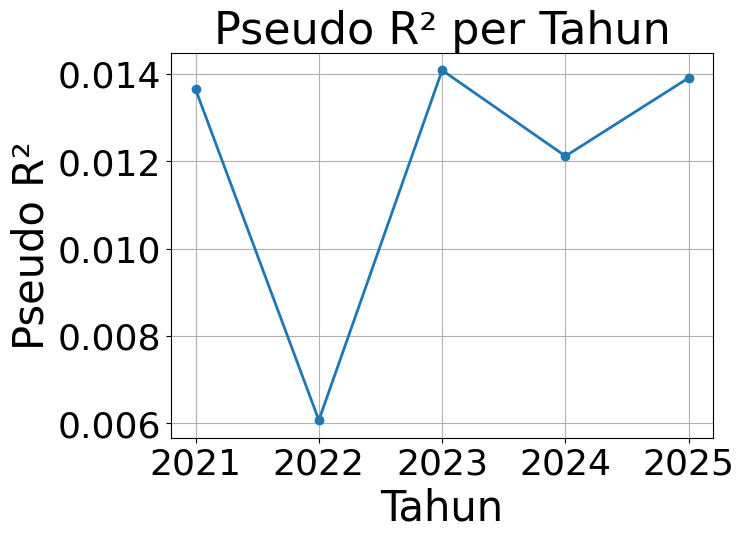

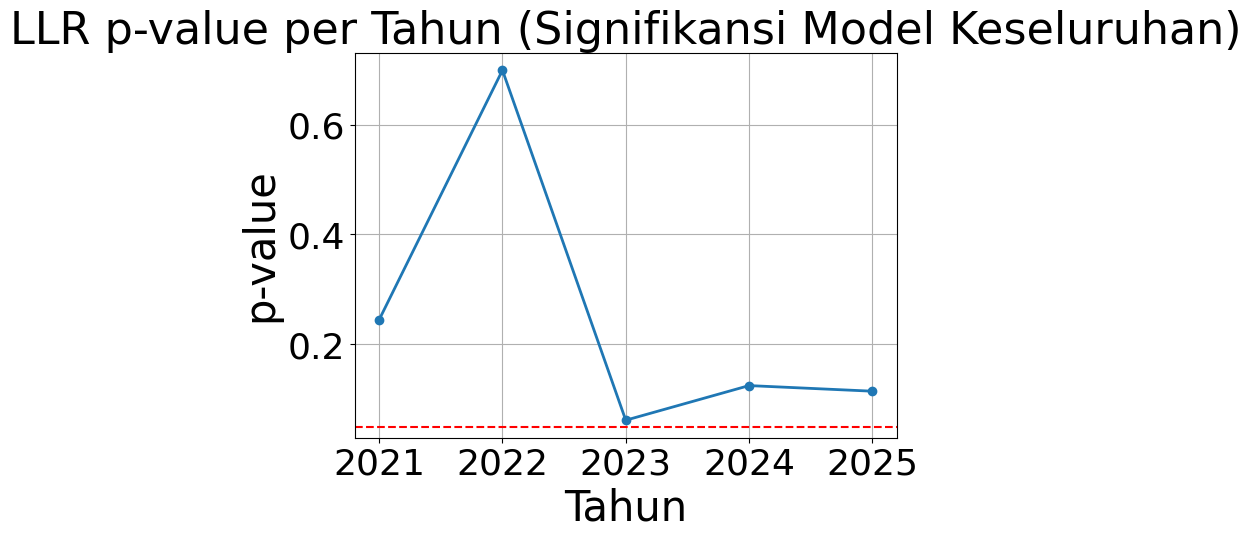

In [168]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cat_vars = [
    'company_id',
    'area_id',
    'position_id',
    'department_id',
    'division_id',
    'directorate_id',
    'grade_id',
    'education_id',
    'major_id'
]

num_vars = ['years_of_service_months']

dfs = [
    (per_emp_2021, 2021),
    (per_emp_2022, 2022),
    (per_emp_2023, 2023),
    (per_emp_2024, 2024),
    (per_emp_2025, 2025),
]

# ===============================
#      SIMPAN HASIL MODEL
# ===============================

summary_list = []

for df, year in dfs:
    print(f"\n========== LOGIT MODEL {year} ==========")

    X = df[num_vars].copy()
    X = pd.concat([X, pd.get_dummies(df[cat_vars], drop_first=True)], axis=1)
    y = df['is_high']

    mask = y.notna() & X.notna().all(axis=1)
    X2 = sm.add_constant(X.loc[mask])

    try:
        model = sm.Logit(y.loc[mask], X2).fit(disp=False)

        params = model.params.drop("const", errors="ignore")           # HAPUS CONST
        odds = np.exp(params)
        pvals = model.pvalues.drop("const", errors="ignore")

        # Simpan ke summary tabel
        summary_list.append({
            "year": year,
            "pseudo_r2": model.prsquared,
            "aic": model.aic,
            "llr_pvalue": model.llr_pvalue,
            "odds": odds,
            "pvals": pvals
        })

    except Exception as e:
        print(f"Model gagal untuk tahun {year}: {e}")

        
# ===============================
#         VISUALISASI
# ===============================

# ---------- 1. Pseudo R2 ----------
plt.figure(figsize=(7,5))
plt.plot([s["year"] for s in summary_list],
         [s["pseudo_r2"] for s in summary_list],
         marker='o', linewidth=2)
plt.title("Pseudo R² per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Pseudo R²")
plt.grid(True)
plt.show()

# ---------- 2. LLR p-value ----------
plt.figure(figsize=(7,5))
plt.plot([s["year"] for s in summary_list],
         [s["llr_pvalue"] for s in summary_list],
         marker='o', linewidth=2)
plt.title("LLR p-value per Tahun (Signifikansi Model Keseluruhan)")
plt.xlabel("Tahun")
plt.ylabel("p-value")
plt.axhline(0.05, color="red", linestyle="--")
plt.grid(True)
plt.show()


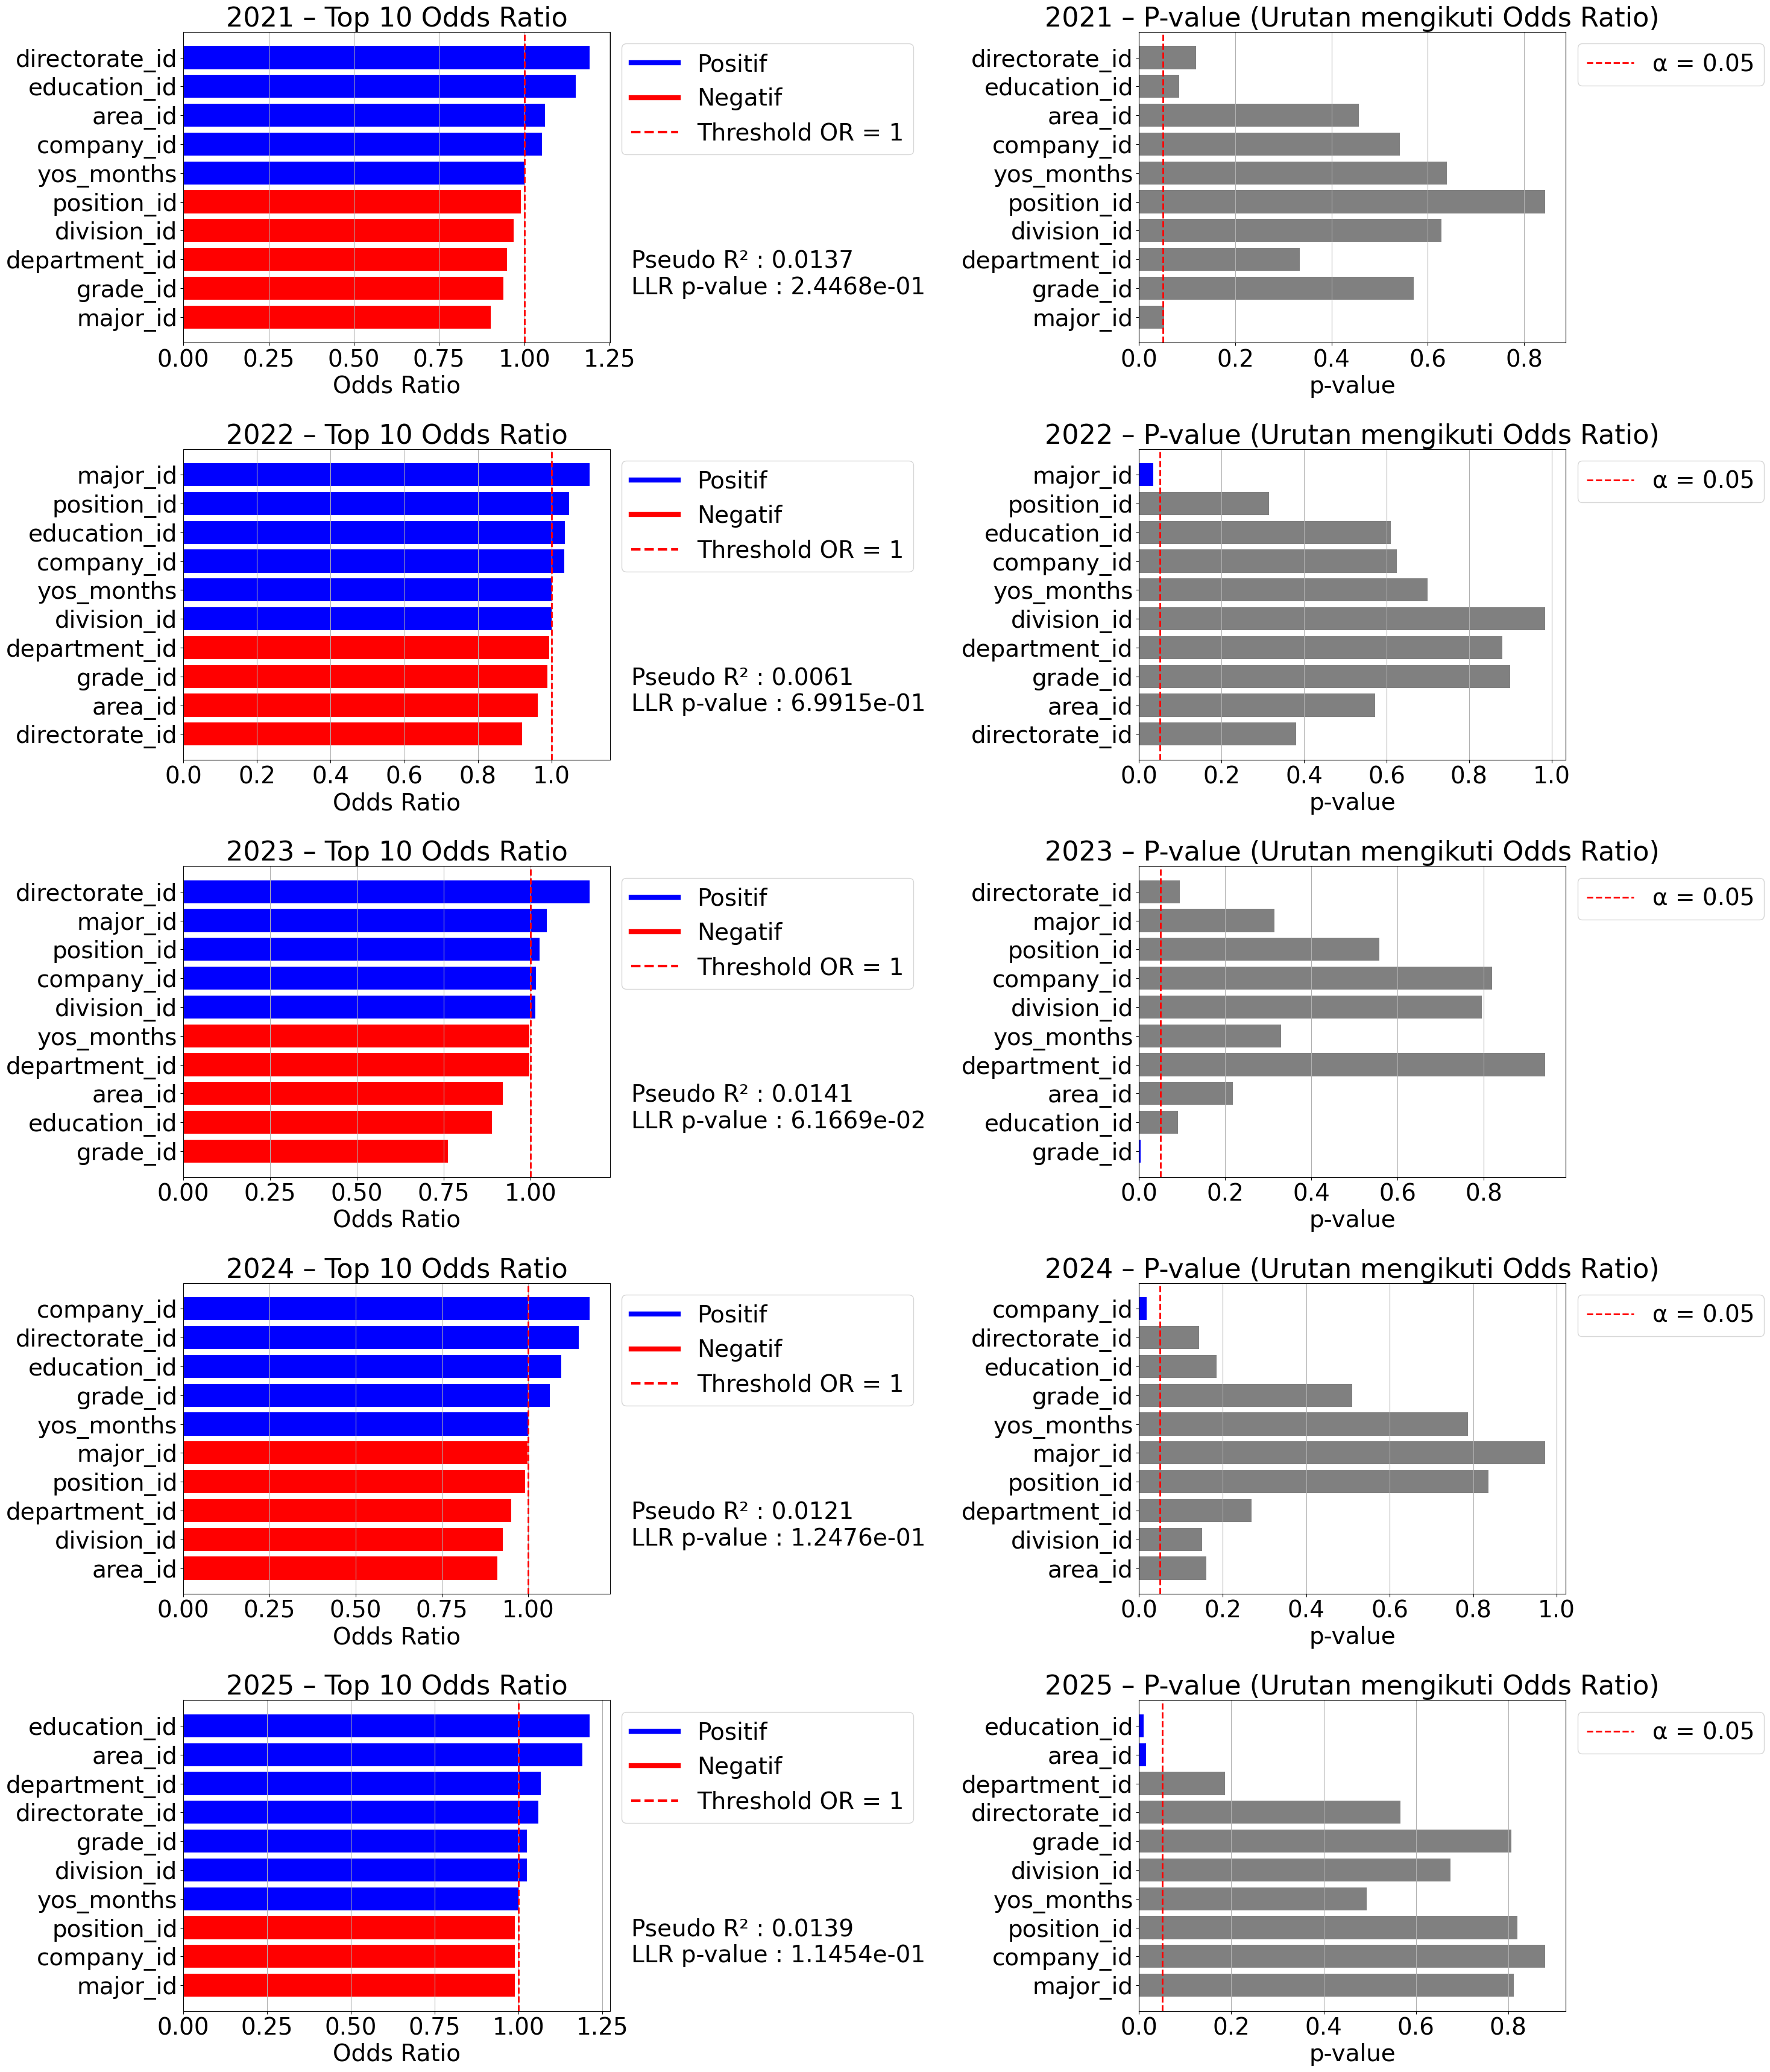

In [165]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cat_vars = [
    'company_id','area_id','position_id','department_id','division_id',
    'directorate_id','grade_id','education_id','major_id'
]

num_vars = ['yos_months']

dfs = [
    (per_emp2_2021, 2021),
    (per_emp2_2022, 2022),
    (per_emp2_2023, 2023),
    (per_emp2_2024, 2024),
    (per_emp2_2025, 2025),
]

summary_list = []

# ====================================================
#                FIT MODEL TIAP TAHUN
# ====================================================
for df, year in dfs:

    X = df[num_vars].copy()
    X = pd.concat([X, pd.get_dummies(df[cat_vars], drop_first=True)], axis=1)
    y = df['is_high']

    mask = y.notna() & X.notna().all(axis=1)
    X2 = sm.add_constant(X.loc[mask])

    try:
        model = sm.Logit(y.loc[mask], X2).fit(disp=False)

        params = model.params.drop("const", errors="ignore")
        odds = np.exp(params)
        pvals = model.pvalues.drop("const", errors="ignore")

        summary_list.append({
            "year": year,
            "pseudo_r2": model.prsquared,
            "aic": model.aic,
            "llr_pvalue": model.llr_pvalue,
            "params": params,
            "odds": odds,
            "pvals": pvals
        })

    except Exception as e:
        print(f"Model gagal untuk tahun {year}: {e}")


# ====================================================
#                SUBPLOT PER TAHUN
# ====================================================
n_years = len(summary_list)
fig, axes = plt.subplots(n_years, 2, figsize=(30, 7 * n_years))

if n_years == 1:
    axes = np.array([axes])

for i, s in enumerate(summary_list):
    year = s["year"]

    # ====== TOP 10 odds ratio ======
    top_odds = s["odds"].sort_values(ascending=False).head(10)
    coef_order = top_odds.index
    coefs = s["params"][coef_order]
    pvals = s["pvals"][coef_order]

    # Warna odds
    odds_colors = ["blue" if c > 0 else "red" for c in coefs]

    # ===== PLOT 1 — Odds Ratio =====
    ax1 = axes[i, 0]
    ax1.barh(coef_order, top_odds.values, color=odds_colors)
    ax1.set_title(f"{year} – Top 10 Odds Ratio", fontsize=32)
    ax1.set_xlabel("Odds Ratio", fontsize=28)
    ax1.tick_params(axis='both', labelsize=28)
    ax1.invert_yaxis()
    ax1.grid(axis="x")

    ax1.axvline(1, color="red", linestyle="--", linewidth=2)

    legend_elements = [
        plt.Line2D([0], [0], color="blue", lw=6, label="Positif"),
        plt.Line2D([0], [0], color="red", lw=6, label="Negatif"),
        plt.Line2D([0], [0], color="red", lw=3, linestyle="--",
                   label="Threshold OR = 1")
    ]

    ax1.legend(
        handles=legend_elements,
        loc="upper left",
        bbox_to_anchor=(1, 1),
        fontsize=28
    )

    # Summary statistik model
    summary_text = (
        f"Pseudo R² : {s['pseudo_r2']:.4f}\n"
        f"LLR p-value : {s['llr_pvalue']:.4e}\n"
    )
    ax1.text(
        1.05, 0.3, summary_text,
        transform=ax1.transAxes,
        fontsize=28,
        verticalalignment="top"
    )


    # ====== Warna p-value ======
    p_colors = ["blue" if pv <= 0.05 else "gray" for pv in pvals]

    # ===== PLOT 2 — P-value =====
    ax2 = axes[i, 1]
    ax2.barh(coef_order, pvals.values, color=p_colors)
    ax2.set_title(f"{year} – P-value (Urutan mengikuti Odds Ratio)", fontsize=32)
    ax2.set_xlabel("p-value", fontsize=28)
    ax2.tick_params(axis='both', labelsize=28)
    ax2.invert_yaxis()
    ax2.axvline(0.05, color="red", linestyle="--", linewidth=2)
    ax2.grid(axis="x")

    ax2.legend(["α = 0.05"], loc="upper left", bbox_to_anchor=(1, 1),
               fontsize=28)


plt.tight_layout()
plt.show()


In [170]:
per_emp_2021

,employee_id,rating,year,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months,is_high
0,EMP100000,2.0,2021,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64,0
1,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,58,0
2,EMP100004,3.0,2021,Dwi Pratama,443809,3,4,6,5,3,3,1,1,5,34,0
3,EMP100006,4.0,2021,Indra Santoso,826406,1,3,3,2,1,2,1,1,4,82,0
4,EMP100007,4.0,2021,Rani Mahendra,878510,4,3,4,3,2,2,3,2,1,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,DUP3015,4.0,2021,Bayu Kurniawan,391102,2,4,1,3,5,3,1,4,1,79,0
1543,DUP1942,1.0,2021,Dewi Fadillah Hidayat,325441,4,4,1,4,1,1,2,2,2,79,0
1544,DUP2096,3.0,2021,Putri Wibowo,149080,3,3,4,4,2,2,1,3,4,49,0
1545,DUP4177,4.0,2021,Adi Ginting,116115,4,2,6,4,4,2,3,2,1,75,0


In [169]:
per_emp2_2021

,employee_id,rating,year,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,yos_months,is_high
0,EMP100000,2.0,2021,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64,0
1,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,58,0
2,EMP100004,3.0,2021,Dwi Pratama,443809,3,4,6,5,3,3,1,1,5,34,0
3,EMP100006,4.0,2021,Indra Santoso,826406,1,3,3,2,1,2,1,1,4,82,0
4,EMP100007,4.0,2021,Rani Mahendra,878510,4,3,4,3,2,2,3,2,1,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,DUP3015,4.0,2021,Bayu Kurniawan,391102,2,4,1,3,5,3,1,4,1,79,0
1543,DUP1942,1.0,2021,Dewi Fadillah Hidayat,325441,4,4,1,4,1,1,2,2,2,79,0
1544,DUP2096,3.0,2021,Putri Wibowo,149080,3,3,4,4,2,2,1,3,4,49,0
1545,DUP4177,4.0,2021,Adi Ginting,116115,4,2,6,4,4,2,3,2,1,75,0
